### Importação dos dados



In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


loja1 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv")
loja2 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv")
loja3 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv")
loja4 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv")



#1. Análise do faturamento

In [4]:
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Mostrar resultados
print(f'Faturamento Loja 1: R$ {faturamento_loja1:,.2f}')
print(f'Faturamento Loja 2: R$ {faturamento_loja2:,.2f}')
print(f'Faturamento Loja 3: R$ {faturamento_loja3:,.2f}')
print(f'Faturamento Loja 4: R$ {faturamento_loja4:,.2f}')


Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


# 2. Vendas por Categoria


In [20]:
categorias_total = pd.concat([
    loja1['Categoria do Produto'],
    loja2['Categoria do Produto'],
    loja3['Categoria do Produto'],
    loja4['Categoria do Produto']
])


In [22]:
contagem_categorias = categorias_total.value_counts()
print(contagem_categorias)


Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


# 3. Média de Avaliação das Lojas

In [24]:
media_loja1 = loja1['Avaliação da compra'].sum() / len(loja1)
print(f'Média de Avaliação Loja 1: {media_loja1:.2f}')

media_loja2 = loja2['Avaliação da compra'].sum() / len(loja2)
print(f'Média de Avaliação Loja 2: {media_loja2:.2f}')

media_loja3 = loja3['Avaliação da compra'].sum() / len(loja3)
print(f'Média de Avaliação Loja 3: {media_loja3:.2f}')

media_loja4 = loja4['Avaliação da compra'].sum() / len(loja4)
print(f'Média de Avaliação Loja 4: {media_loja4:.2f}')

media_geral = (media_loja1 + media_loja2 + media_loja3 + media_loja4) / 4

valor_total = (loja1['Avaliação da compra'].sum() + loja2['Avaliação da compra'].sum() + loja3['Avaliação da compra'].sum() + loja4['Avaliação da compra'].sum())
linhas_totais = (len(loja1) + len(loja2) + len(loja3) + len(loja4))
media_geral = valor_total / linhas_totais
print(f'Média total de Avaliação das lojas: {media_geral:.2f}')

Média de Avaliação Loja 1: 3.98
Média de Avaliação Loja 2: 4.04
Média de Avaliação Loja 3: 4.05
Média de Avaliação Loja 4: 4.00
Média total de Avaliação das lojas: 4.01


# 4. Produtos Mais e Menos Vendidos

In [48]:
vendas_por_prod_loja1 = loja1['Produto'].value_counts()
# Produto mais vendido
produto_mais_vendido = vendas_por_prod_loja1.idxmax()
quantidade_mais_vendida = vendas_por_prod_loja1.max()
# Produto menos vendido
produto_menos_vendido = vendas_por_prod_loja1.idxmin()
quantidade_menos_vendida = vendas_por_prod_loja1.min()

print(f"Produto mais vendido loja1: {produto_mais_vendido} ({quantidade_mais_vendida} unidades)")
print(f"Produto menos vendido loja1: {produto_menos_vendido} ({quantidade_menos_vendida} unidades)")

vendas_por_prod_loja2 = loja2['Produto'].value_counts()
# Produto mais vendido
produto_mais_vendido2 = vendas_por_prod_loja2.idxmax()
quantidade_mais_vendida2 = vendas_por_prod_loja2.max()
# Produto menos vendido
produto_menos_vendido2 = vendas_por_prod_loja2.idxmin()
quantidade_menos_vendida2 = vendas_por_prod_loja2.min()
print()
print(f"Produto mais vendido loja2: {produto_mais_vendido2} ({quantidade_mais_vendida2} unidades)")
print(f"Produto menos vendido loja2: {produto_menos_vendido2} ({quantidade_menos_vendida2} unidades)")


vendas_por_prod_loja3 = loja3['Produto'].value_counts()
# Produto mais vendido
produto_mais_vendido3 = vendas_por_prod_loja3.idxmax()
quantidade_mais_vendida3 = vendas_por_prod_loja3.max()
# Produto menos vendido
produto_menos_vendido3 = vendas_por_prod_loja3.idxmin()
quantidade_menos_vendida3 = vendas_por_prod_loja3.min()
print()
print(f"Produto mais vendido loja3: {produto_mais_vendido3} ({quantidade_mais_vendida3} unidades)")
print(f"Produto menos vendido loja3: {produto_menos_vendido3} ({quantidade_menos_vendida3} unidades)")

vendas_por_prod_loja4 = loja4['Produto'].value_counts()
# Produto mais vendido
produto_mais_vendido4 = vendas_por_prod_loja4.idxmax()
quantidade_mais_vendida4 = vendas_por_prod_loja4.max()
# Produto menos vendido
produto_menos_vendido4 = vendas_por_prod_loja4.idxmin()
quantidade_menos_vendida4 = vendas_por_prod_loja4.min()
print()
print(f"Produto mais vendido loja4: {produto_mais_vendido4} ({quantidade_mais_vendida4} unidades)")
print(f"Produto menos vendido loja4: {produto_menos_vendido4} ({quantidade_menos_vendida4} unidades)")

vendas_geral = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)
vendas_por_prod_geral = vendas_geral['Produto'].value_counts()
# Produto mais vendido
produto_mais_vendido_geral = vendas_por_prod_geral.idxmax()
quantidade_mais_vendida_geral = vendas_por_prod_geral.max()
# Produto menos vendido
produto_menos_vendido_geral = vendas_por_prod_geral.idxmin()
quantidade_menos_vendida_geral = vendas_por_prod_geral.min()
print()
print(f"Produto mais vendido geral: {produto_mais_vendido_geral} ({quantidade_mais_vendida_geral} unidades)")
print(f"Produto menos vendido geral: {produto_menos_vendido_geral} ({quantidade_menos_vendida_geral} unidades)")

Produto mais vendido loja1: Micro-ondas (60 unidades)
Produto menos vendido loja1: Headset (33 unidades)

Produto mais vendido loja2: Iniciando em programação (65 unidades)
Produto menos vendido loja2: Jogo de tabuleiro (32 unidades)

Produto mais vendido loja3: Kit banquetas (57 unidades)
Produto menos vendido loja3: Blocos de montar (35 unidades)

Produto mais vendido loja4: Cama box (62 unidades)
Produto menos vendido loja4: Guitarra (33 unidades)

Produto mais vendido geral: Cômoda (210 unidades)
Produto menos vendido geral: Celular ABXY (157 unidades)


# 5. Frete Médio por Loja


In [9]:
Frete_loja1 = loja1['Frete'].sum()
Frete_loja2 = loja2['Frete'].sum()
Frete_loja3 = loja3['Frete'].sum()
Frete_loja4 = loja4['Frete'].sum()

# Mostrar resultados
print(f'Frete Loja 1: R$ {Frete_loja1:,.2f}')
print(f'Frete Loja 2: R$ {Frete_loja2:,.2f}')
print(f'Frete Loja 3: R$ {Frete_loja3:,.2f}')
print(f'Frete Loja 4: R$ {Frete_loja4:,.2f}')

Frete Loja 1: R$ 81,837.97
Frete Loja 2: R$ 79,314.16
Frete Loja 3: R$ 78,022.66
Frete Loja 4: R$ 73,755.88


In [31]:
Frete_Loja1 = 81837.97
Frete_Loja2 = 79314.16
Frete_Loja3 = 78022.66
Frete_Loja4 = 73755.88

media_frete_loja1 = loja1['Frete'].dropna()
media = Frete_Loja1 / len(media_frete_loja1)
print(f'Média de frete Loja 1 :  {media:.2f}')

media_frete_loja2 = loja2['Frete'].dropna()
media = Frete_Loja2 / len(media_frete_loja2)
print(f'Média de frete Loja 2 :  {media:.2f}')

media_frete_loja3 = loja3['Frete'].dropna()
media = Frete_Loja3 / len(media_frete_loja3)
print(f'Média de frete Loja 3 :  {media:.2f}')

media_frete_loja4 = loja4['Frete'].dropna()
media = Frete_Loja4 / len(media_frete_loja4)
print(f'Média de frete Loja 4 :  {media:.2f}')






Média de frete Loja 1 :  34.69
Média de frete Loja 2 :  33.62
Média de frete Loja 3 :  33.07
Média de frete Loja 4 :  31.28


#Gráficos


###Análise Faturamento

<ipython-input-6-fdcaf437b9ad>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


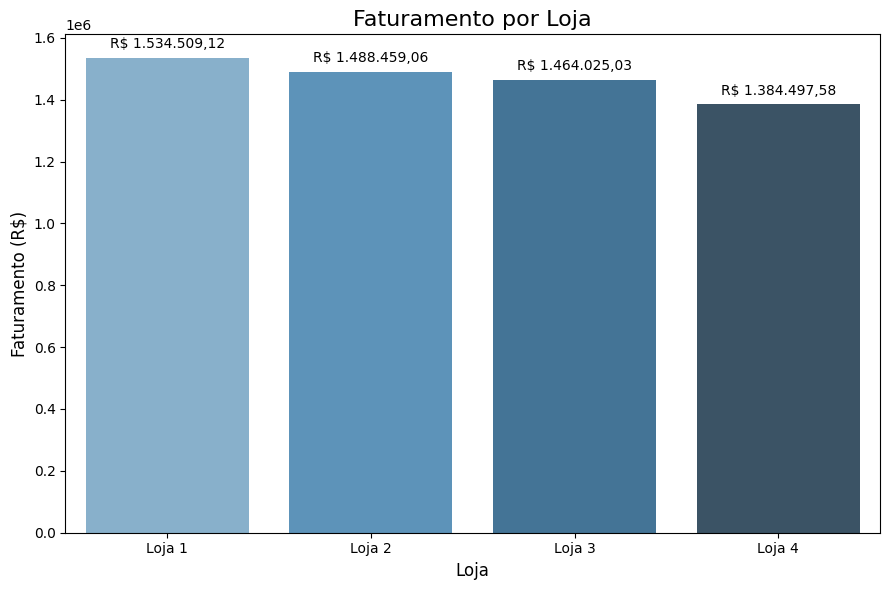

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados do faturamento
faturamento_lojas = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [1534509.12, 1488459.06, 1464025.03, 1384497.58]
})

# Ordena do maior para o menor (opcional)
faturamento_lojas = faturamento_lojas.sort_values(by='Faturamento', ascending=False)

# Cria o gráfico
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=faturamento_lojas,
    x='Loja',
    y='Faturamento',
    palette='Blues_d'
)

# Títulos e labels
plt.title('Faturamento por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)

# Adiciona os valores em cima das barras, formatados em R$
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'R$ {v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') for v in container.datavalues],
        padding=5,
        fontsize=10,
        color='black'
    )

# Ajusta layout
plt.tight_layout()
plt.show()

###Frete

<ipython-input-10-90ed0c532749>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


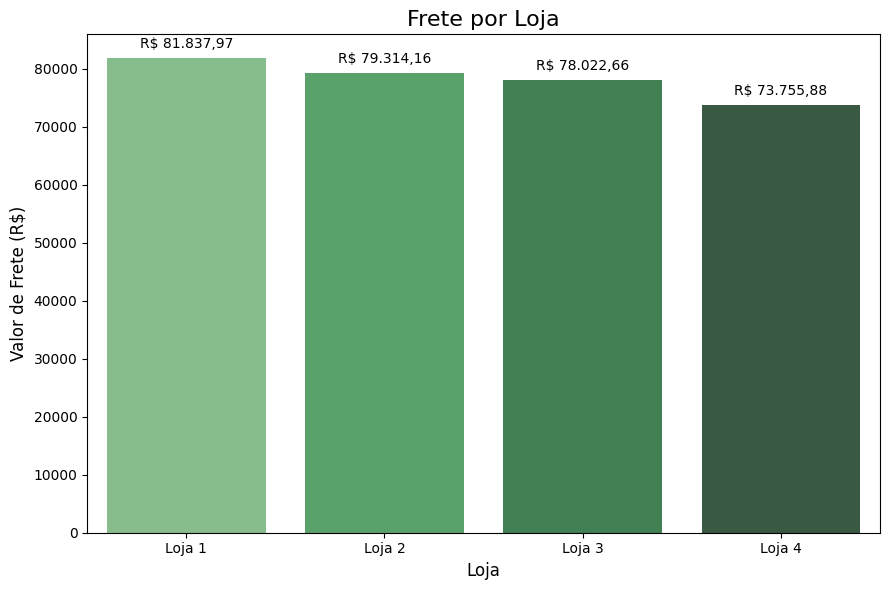

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados do frete
frete_lojas = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete': [81837.97, 79314.16, 78022.66, 73755.88]
})

# Ordena do maior para o menor (opcional)
frete_lojas = frete_lojas.sort_values(by='Frete', ascending=False)

# Cria o gráfico
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=frete_lojas,
    x='Loja',
    y='Frete',
    palette='Greens_d'
)

# Títulos e labels
plt.title('Frete por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Valor de Frete (R$)', fontsize=12)

# Adiciona os valores em cima das barras, formatados em R$
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'R$ {v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') for v in container.datavalues],
        padding=5,
        fontsize=10,
        color='black'
    )

# Ajusta layout
plt.tight_layout()
plt.show()

###Categorias mais populares

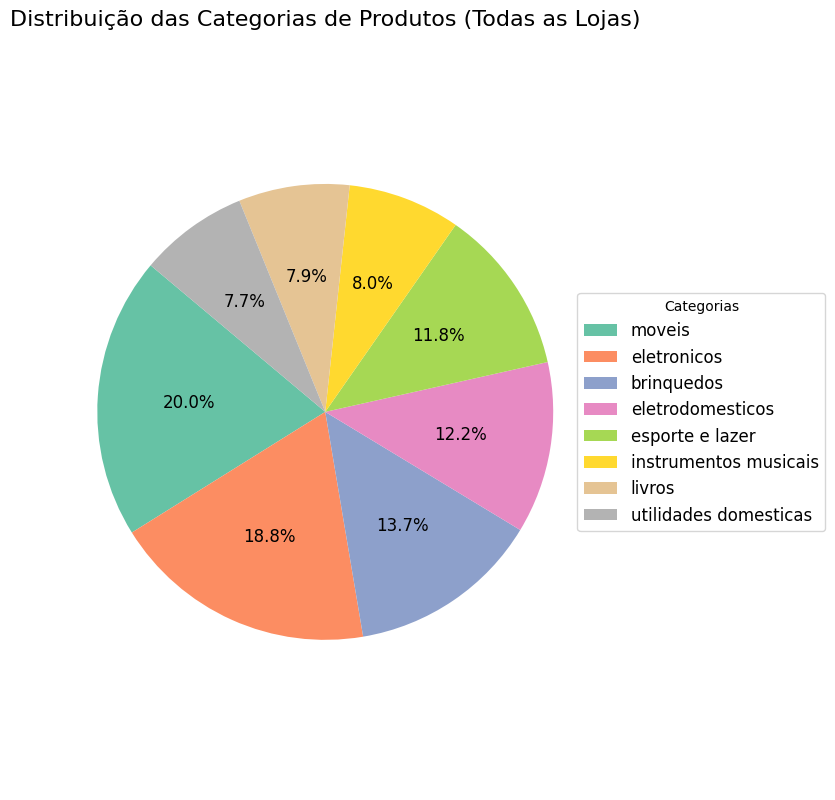

In [24]:
import matplotlib.pyplot as plt

# 1. Criar a lista de cores (escolhendo uma paleta mais bonita)
cores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']

# 2. Aumentar a "explosão" (separação) das três categorias mais vendidas
explode = [0.1 if i < 3 else 0.02 for i in range(len(contagem_categorias))]

# 3. Criar o gráfico
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    contagem_categorias,
    labels=None,  # Sem labels aqui para deixar limpo
    colors=cores,
    autopct='%1.1f%%',
    startangle=140,
    shadow=False,
    textprops={'fontsize': 12}
)

# 4. Adicionar legenda separada
plt.legend(
    wedges,
    contagem_categorias.index,
    title="Categorias",
    loc="center",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

# 5. Título e ajuste do gráfico
plt.title('Distribuição das Categorias de Produtos (Todas as Lojas)', fontsize=16, loc='center')
plt.axis('equal')  # Garantir círculo perfeito
plt.tight_layout(pad=0.7)
plt.show()
bbox_inches='tight'

###Avaliação Cliente

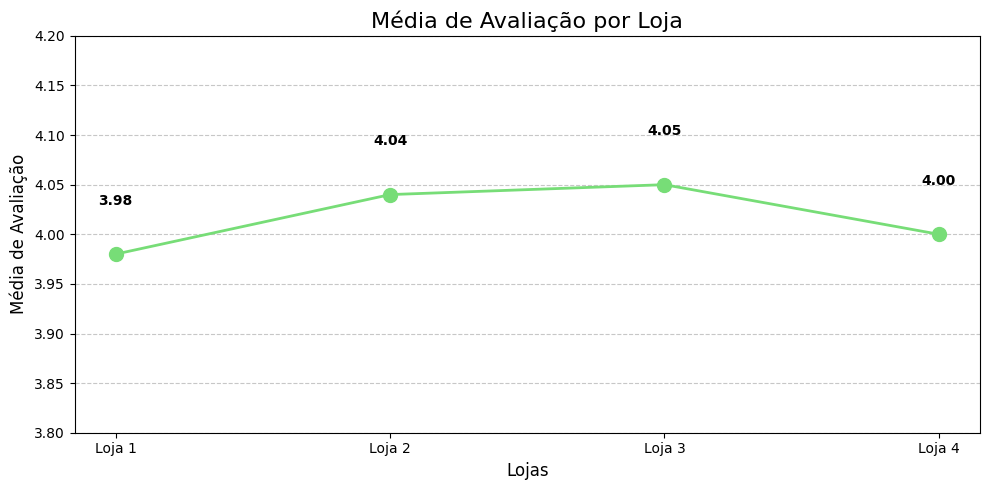

In [35]:
import matplotlib.pyplot as plt

# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [3.98, 4.04, 4.05, 4.00]

# Criar figura
plt.figure(figsize=(10, 5))

# Plotar linha com marcações
plt.plot(lojas, medias, marker='o', linestyle='-', color='#77DD77', markersize=10, linewidth=2)

# Adicionar valores nos pontos
for i, v in enumerate(medias):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold', fontsize=10)

# Títulos e labels
plt.title('Média de Avaliação por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Média de Avaliação', fontsize=12)
plt.ylim(3.8, 4.2)  # Foco na faixa de interesse para destacar diferenças sutis
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




###Produtos mais e menos vendidos

In [29]:
import matplotlib.pyplot as plt

# Dados juntos
produtos = [
    'Micro-ondas', 'Headset',
    'Iniciando em programação', 'Jogo de tabuleiro',
    'Kit banquetas', 'Blocos de montar',
    'Cama box', 'Guitarra',
    'Cômoda', 'Celular ABXY'
]

quantidades = [60, 33, 65, 32, 57, 35, 62, 33, 210, 157]


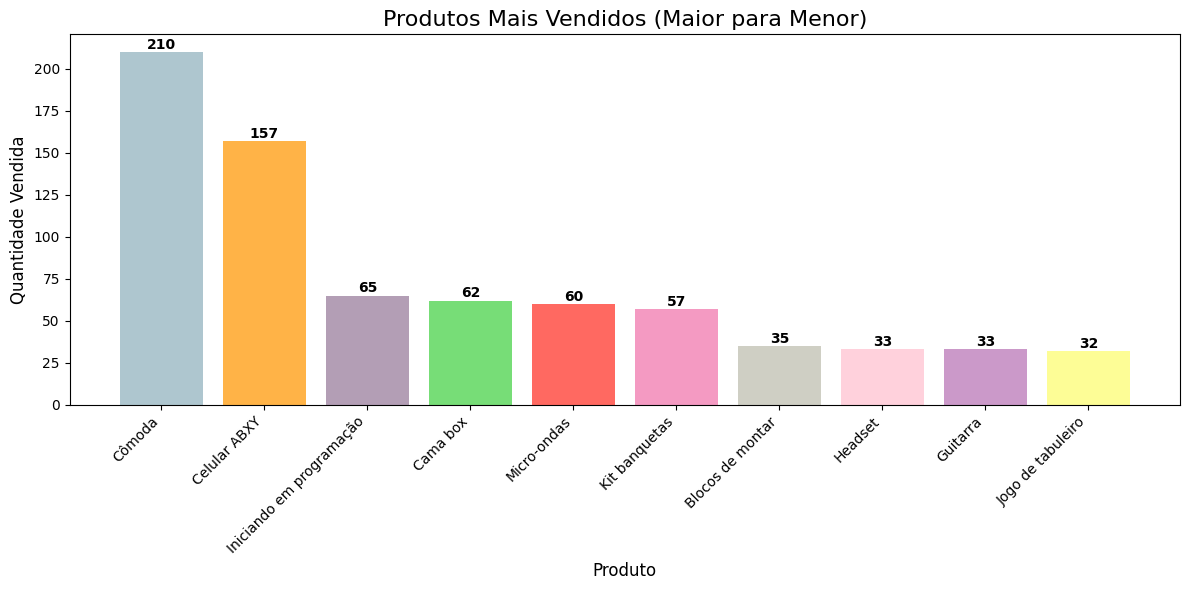

In [30]:
# Organizar os dados do maior para o menor
produtos_quantidades = list(zip(produtos, quantidades))
produtos_quantidades.sort(key=lambda x: x[1], reverse=True)  # Ordena pela quantidade

# Separar de novo em listas
produtos_ordenados, quantidades_ordenadas = zip(*produtos_quantidades)

# Cores suaves (tons pastéis)
cores_pasteis = [
    '#AEC6CF', '#FFB347', '#B39EB5', '#77DD77', '#FF6961',
    '#F49AC2', '#CFCFC4', '#FFD1DC', '#CB99C9', '#FDFD96'
]

# Plotando
plt.figure(figsize=(12, 6))
bars = plt.bar(produtos_ordenados, quantidades_ordenadas, color=cores_pasteis)

# Adiciona os números em cima das barras
for i, v in enumerate(quantidades_ordenadas):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')

plt.title('Produtos Mais Vendidos (Maior para Menor)', fontsize=16)
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Análises Extras

## Tipo de Pagamento / Total vendas por tipo pagamento /

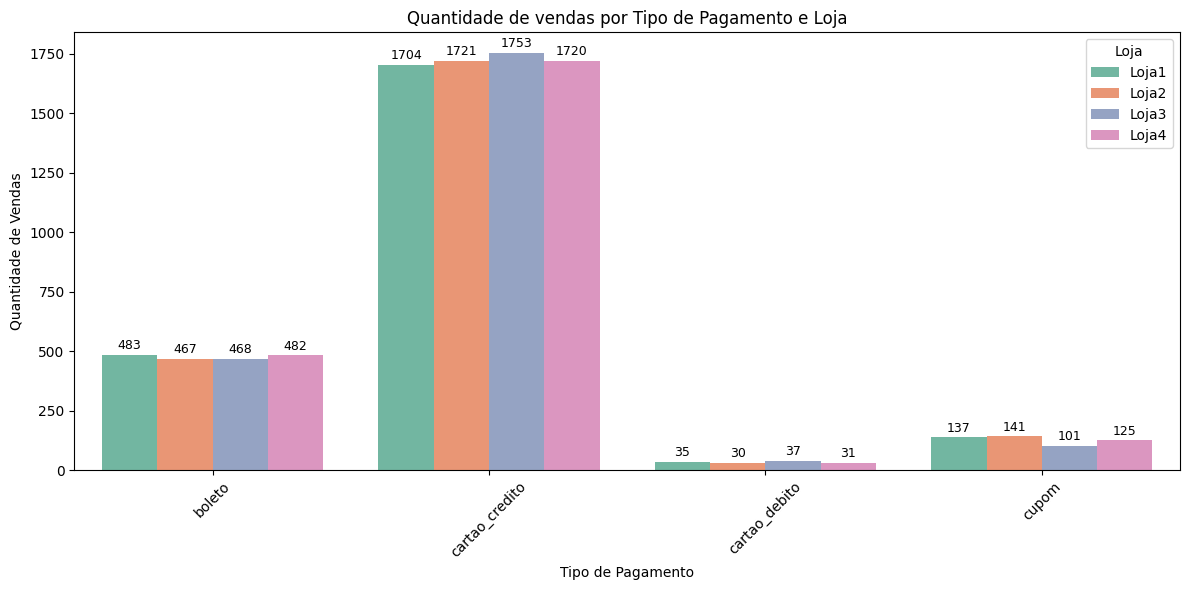

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=resumo_por_loja,
    x='Tipo de pagamento',
    y='Quantidade',
    hue='Loja',
    palette='Set2'
)

plt.title('Quantidade de vendas por Tipo de Pagamento e Loja')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Loja')
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionar números dentro das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2, fontsize=9)

plt.show()


<ipython-input-25-ce06b28f02bd>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


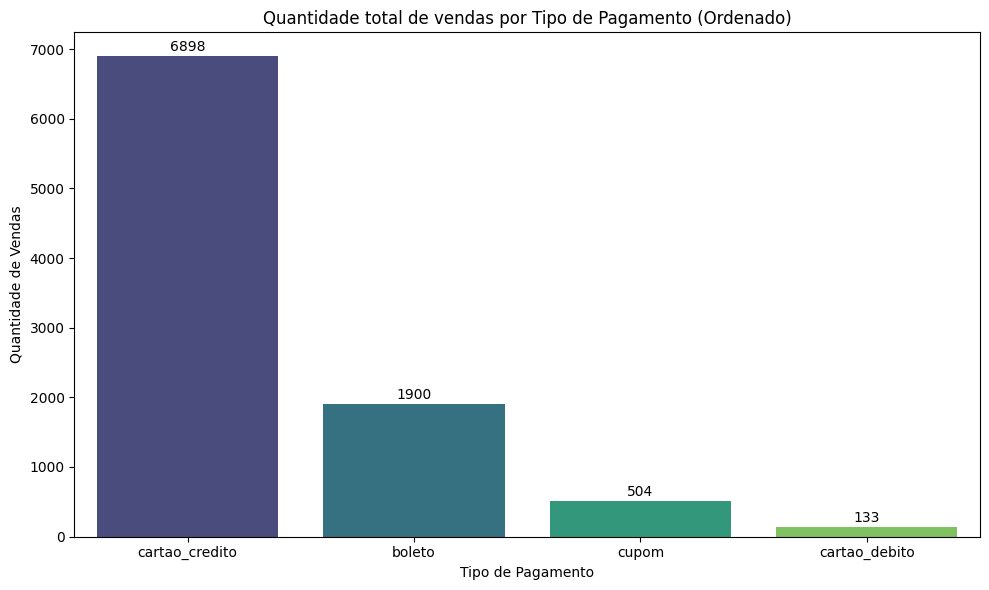

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que o seu dataframe se chama resumo_total
# Vou criar manualmente agora, baseado nos números que você passou:
import pandas as pd

resumo_total = pd.DataFrame({
    'Tipo de pagamento': ['boleto', 'cartao_credito', 'cartao_debito', 'cupom'],
    'Quantidade': [1900, 6898, 133, 504],
    'Receita': [1174246.18, 4307472.04, 75277.47, 314495.10]
})

# Ordena do maior para o menor em Quantidade
resumo_total = resumo_total.sort_values(by='Quantidade', ascending=False)

# Cria o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=resumo_total,
    x='Tipo de pagamento',
    y='Quantidade',
    palette='viridis'
)

# Títulos e labels
plt.title('Quantidade total de vendas por Tipo de Pagamento (Ordenado)')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Quantidade de Vendas')

# Adiciona os números em cima das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2, fontsize=10)

# Ajusta layout
plt.tight_layout()
plt.show()


###Lucro

In [12]:
# Lucro
lucro_loja1 = faturamento_loja1 - Frete_loja1
lucro_loja2 = faturamento_loja2 - Frete_loja2
lucro_loja3 = faturamento_loja3 - Frete_loja3
lucro_loja4 = faturamento_loja4 - Frete_loja4

# Exibir resultados
print(f'Lucro Loja 1: R$ {lucro_loja1:,.2f}')
print(f'Lucro Loja 2: R$ {lucro_loja2:,.2f}')
print(f'Lucro Loja 3: R$ {lucro_loja3:,.2f}')
print(f'Lucro Loja 4: R$ {lucro_loja4:,.2f}')


Lucro Loja 1: R$ 1,452,671.15
Lucro Loja 2: R$ 1,409,144.90
Lucro Loja 3: R$ 1,386,002.37
Lucro Loja 4: R$ 1,310,741.70


<ipython-input-14-acba80f5f256>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


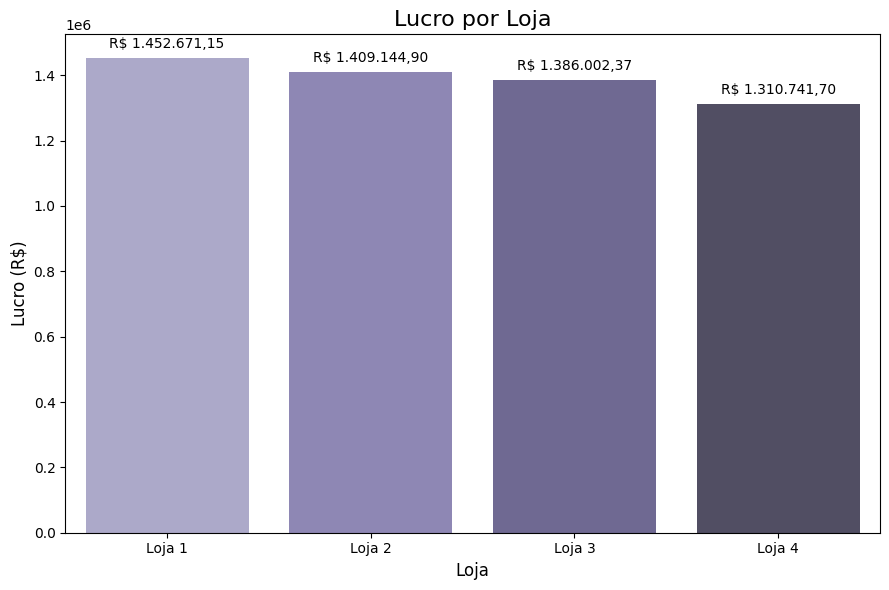

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados do lucro
lucro_lojas = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Lucro': [1452671.15, 1409144.90, 1386002.37, 1310741.70]
})

# Ordena do maior para o menor
lucro_lojas = lucro_lojas.sort_values(by='Lucro', ascending=False)

# Cria o gráfico
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=lucro_lojas,
    x='Loja',
    y='Lucro',
    palette='Purples_d'
)

# Títulos e labels
plt.title('Lucro por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Lucro (R$)', fontsize=12)

# Adiciona os valores em cima das barras, formatados em R$
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'R$ {v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') for v in container.datavalues],
        padding=5,
        fontsize=10,
        color='black'
    )

# Ajusta layout
plt.tight_layout()
plt.show()


### Estado campeão vendas por loja

In [17]:
# Agrupar por Local da compra (Estado) e somar o faturamento (Preço)

vendas_estado_loja1 = loja1.groupby('Local da compra')['Preço'].sum()
vendas_estado_loja2 = loja2.groupby('Local da compra')['Preço'].sum()
vendas_estado_loja3 = loja3.groupby('Local da compra')['Preço'].sum()
vendas_estado_loja4 = loja4.groupby('Local da compra')['Preço'].sum()

# Mostrar o estado que mais vendeu em cada loja
print('Loja 1 - Estado campeão de vendas:')
print(vendas_estado_loja1.idxmax(), vendas_estado_loja1.max())

print('Loja 2 - Estado campeão de vendas:')
print(vendas_estado_loja2.idxmax(), vendas_estado_loja2.max())

print('Loja 3 - Estado campeão de vendas:')
print(vendas_estado_loja3.idxmax(), vendas_estado_loja3.max())

print('Loja 4 - Estado campeão de vendas:')
print(vendas_estado_loja4.idxmax(), vendas_estado_loja4.max())

Loja 1 - Estado campeão de vendas:
SP 586673.21
Loja 2 - Estado campeão de vendas:
SP 639945.67
Loja 3 - Estado campeão de vendas:
SP 634081.24
Loja 4 - Estado campeão de vendas:
SP 559106.82


<ipython-input-19-1119307edeaf>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


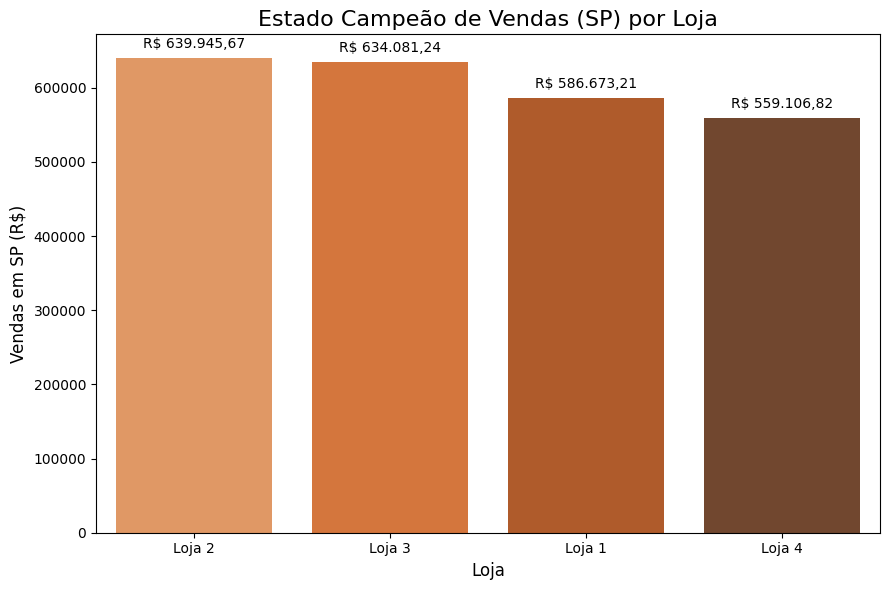

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados dos estados campeões
estado_campeao = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Vendas_SP': [586673.21, 639945.67, 634081.24, 559106.82]
})

# Ordena do maior para o menor
estado_campeao = estado_campeao.sort_values(by='Vendas_SP', ascending=False)

# Cria o gráfico
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=estado_campeao,
    x='Loja',
    y='Vendas_SP',
    palette='Oranges_d'
)

# Títulos e labels
plt.title('Estado Campeão de Vendas (SP) por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Vendas em SP (R$)', fontsize=12)

# Adiciona os valores em cima das barras, formatados em R$
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'R$ {v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') for v in container.datavalues],
        padding=5,
        fontsize=10,
        color='black'
    )

# Ajusta layout
plt.tight_layout()
plt.show()